In [10]:
from Utils import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os.path


In [11]:
coupling_type = '1JHN'
XY_Data = pd.read_csv(f'{Config.INPUT_XY}/{coupling_type}.csv', index_col=0)

In [12]:
XY_train, XY_Val =  train_test_split(XY_Data, test_size=0.3, random_state=228)
X_val, y_val = build_x_y_data(XY_Val)    

In [13]:
isFilter = True
if isFilter:
    dpOldErr = get_filtered_errors(coupling_type)
    XY_Train_Filtered = get_filtered_xy(XY_train, dpOldErr)
else:
    XY_Train_Filtered = XY_train    
X_train, y_train = build_x_y_data(XY_Train_Filtered)    
    


In [14]:
#X_data, y_data = build_x_y_data(XY_Filtered)
#X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3, random_state=228)

In [15]:
%time 
categorical_features = [col for col in X_train if col.startswith('atom_')]

#X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3, random_state=228)
# to record eval results for plotting
model = LGBMRegressor(**Config.LGB_PARAMS, n_estimators=3000, n_jobs = -1)
model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='mae',
        verbose=100, early_stopping_rounds=1000,
         categorical_feature = categorical_features)

y_pred = model.predict(X_val)
print(mean_absolute_error(y_val, y_pred))
np.log(mean_absolute_error(y_val, y_pred))


Wall time: 0 ns
Training until validation scores don't improve for 1000 rounds.


C:\ProgramFiles\Anaconda\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'atom_7', 'atom_8', 'atom_9']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[100]	training's l1: 0.417056	valid_1's l1: 0.543976
[200]	training's l1: 0.320514	valid_1's l1: 0.489103
[300]	training's l1: 0.270193	valid_1's l1: 0.46592
[400]	training's l1: 0.238101	valid_1's l1: 0.453978
[500]	training's l1: 0.216384	valid_1's l1: 0.4476
[600]	training's l1: 0.200386	valid_1's l1: 0.442523
[700]	training's l1: 0.188253	valid_1's l1: 0.43941
[800]	training's l1: 0.178598	valid_1's l1: 0.437227
[900]	training's l1: 0.170778	valid_1's l1: 0.435524
[1000]	training's l1: 0.164314	valid_1's l1: 0.43424
[1100]	training's l1: 0.158918	valid_1's l1: 0.433237
[1200]	training's l1: 0.154385	valid_1's l1: 0.432474
[1300]	training's l1: 0.150794	valid_1's l1: 0.431947
[1400]	training's l1: 0.147766	valid_1's l1: 0.431478
[1500]	training's l1: 0.145123	valid_1's l1: 0.430994
[1600]	training's l1: 0.142925	valid_1's l1: 0.430634
[1700]	training's l1: 0.140826	valid_1's l1: 0.430432
[1800]	training's l1: 0.139068	valid_1's l1: 0.430178
[1900]	training's l1: 0.137473	valid_1's l

-0.8954586903706878

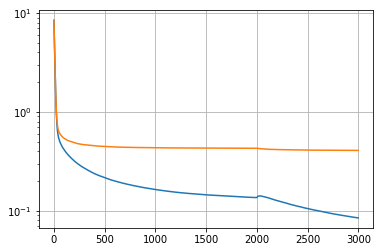

In [16]:
eval_results = model.evals_result_
l1 = eval_results["training"]["l1"]
plt.plot(l1)

valid = eval_results["valid_1"]["l1"]
plt.plot(valid)

#ax.set_yticks(np.linspace(100, 1000, 10))
plt.yscale('log')
plt.grid(True)

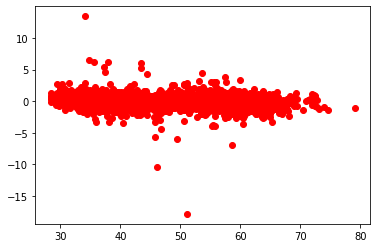

In [17]:
plt.plot(y_val, y_pred- y_val, 'ro')

In [18]:
(y_pred- y_val).describe()

count    7252.000000
mean       -0.009773
std         0.698969
min       -17.859352
25%        -0.247956
50%         0.007249
75%         0.253004
max        13.431165
Name: scalar_coupling_constant, dtype: float64